## Deep Neural 

In the previous chapter, we briefly introduced some basic knowledge of neural networks, and also demonstrated how to construct a complex nonlinear two-classifier using neural networks. In more cases, neural networks are suitable for use in more complex situations, such as image classification. Question, let's use the depth-learning entry-level dataset MNIST handwritten classification to illustrate the superior performance of deeper neural networks.

## MNIST Dataset

The mnist dataset is a very well-known dataset. Basically, many networks use it as a test standard from the National Institute of Standards and Technology (NIST). The training set consists of numbers written by 250 different people, 50% of whom are high school students and 50% of the staff from the Census Bureau, with a total of 60,000 pictures. The test set is also the same proportion of handwritten digital data, with a total of 10,000 images.

Each image is 28 x 28 grayscale, as follows
![](http://corochann.com/wp-content/uploads/2017/02/mnist_plot-800x600.png)

So our task is to give a picture, we want to distinguish which of the 10 numbers from 0 to 9.

## Multi Classification

It is a 10-category problem, collectively called multi-classification problem. For the multi-classification problem, our loss function uses a more complex function called cross-entropy.

## Softmax

Referring to cross entropy, let's talk about the softmax function. We have seen the sigmoid function before, as follows

$$s(x) = \frac{1}{1 + e^{-x}}$$

You can convert any value to 0 ~ 1, of course, for a two-class problem, this is enough, because for the two-category problem, if it does not belong to the first class, it must belong to the second class, so only need to use one The value indicates that it belongs to one of the types of probabilities, but for multi-classification problems, this does not work, you need to know the probability of belonging to each class, this time you need the softmax function.

The softmax function example is as follows

![](https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg)

## Cross Entropy

Cross-entropy measures a measure of the similarity of two distributions. The loss function of the two-category problem mentioned above is a special case of cross-entropy. The general formula of cross-entropy is

$$
cross\_entropy(p, q) = E_{p}[-\log q] = - \frac{1}{m} \sum_{x} p(x) \log q(x)
$$

For the two classification problem we can write

$$
-\frac{1}{m} \sum_{i=1}^m (y^{i} \log sigmoid(x^{i}) + (1 - y^{i}) \log (1 - sigmoid(x^{i}))
$$

This is the loss of the two-category problem we talked about earlier. At the time, we didn't explain the reason. We just gave the formula and explained its rationality. Now we give the formula to prove that it is reasonable to take the loss function.

Below we use mnist directly to talk about deep neural networks.

In [18]:
import numpy as np
import torch
from torchvision.datasets import mnist # Import pytorch built-in mnist data

from torch import nn
from torch.autograd import Variable

In [19]:
train_set = mnist.MNIST('./data', train=True, download=True)
test_set = mnist.MNIST('./data', train=False, download=True)

Processing...
Done!


In [20]:
a_data, a_label = train_set[0]

In [21]:
a_data

In [22]:
a_label

tensor(5)

The data read in here is the format in the PIL library, and we can easily convert it to a numpy array.

In [23]:
a_data = np.array(a_data, dtype='float32')
print(a_data.shape)

(28, 28)


Here we can see that the size of this image is 28 x 28

In [24]:
print(a_data)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

For neural networks, our first layer of input is 28 x 28 = 784, so we have to make a transformation of the resulting data, and use reshape to flatten them into a one-dimensional vector.

In [25]:
def data_tf(x):
    x = np.array(x, dtype='float32') / 255
    x = (x - 0.5) / 0.5 #This will be discussed later
    x = x.reshape((-1,)) # Flatten
    x = torch.from_numpy(x) #numpy to Torch tensor
    return x

train_set = mnist.MNIST('./data', train=True, transform=data_tf, download=True) # Reload the dataset
test_set = mnist.MNIST('./data', train=False, transform=data_tf, download=True)

In [26]:
a, a_label = train_set[0]
print(a.shape)
print(a_label)

torch.Size([784])
tensor(5)


In [27]:
from torch.utils.data import DataLoader
# Define a data iterator using the DataDownloader that comes with pytorch
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(test_set, batch_size=128, shuffle=False)

It is necessary to use such data iterators. If the amount of data is too large, you cannot read them all into memory at a time, so you need to use pytorch iterators to generate one batch of data each time.

In [28]:
a, a_label = next(iter(train_data))

In [29]:
# Print the data size of a batch 
print(a.shape)
print(a_label.shape)

torch.Size([64, 784])
torch.Size([64])


In [30]:
#using sequential to declare a 4 layer neural network
net = nn.Sequential(
    nn.Linear(784, 400),
    nn.ReLU(),
    nn.Linear(400, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

In [31]:
net

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
)

In [32]:
#Define the loss function

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), 1e-1) # using Stocastic Gradient descent with learning rate 0.1

In [38]:
# Start Training
losses = []
accur = []
val_losses = []
val_accur = []

for e in range(20):
    train_loss = 0
    train_acc = 0
    net.train()
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # Forward Propagation
        out = net(im)
        loss = criterion(out, label)
        # Back Propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Recoding error
        train_loss += loss.item() 
        #item() Returns the value of this tensor as a standard Python number.
        # Calculate the accuracy of the classification
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    accur.append(train_acc / len(train_data))
    # Test the effect on the test set
    val_loss = 0
    val_acc = 0
    net.eval() # Change model to prediction mode
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        # Recording error
        val_loss += loss.item()
        # Recording accuracy
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        val_acc += acc
        
    val_losses.append(val_loss / len(test_data))
    val_accur.append(val_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Val Loss: {:.6f}, Val Acc: {:.6f}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data), 
                     val_loss / len(test_data), val_acc / len(test_data)))

epoch: 0, Train Loss: 0.044709, Train Acc: 0.985308, Val Loss: 0.074666, Val Acc: 0.977551
epoch: 1, Train Loss: 0.048382, Train Acc: 0.985391, Val Loss: 0.063660, Val Acc: 0.981309
epoch: 2, Train Loss: 0.033482, Train Acc: 0.989339, Val Loss: 0.072962, Val Acc: 0.976760
epoch: 3, Train Loss: 0.030056, Train Acc: 0.990438, Val Loss: 0.073689, Val Acc: 0.977156
epoch: 4, Train Loss: 0.025690, Train Acc: 0.991538, Val Loss: 0.085370, Val Acc: 0.977255
epoch: 5, Train Loss: 0.020387, Train Acc: 0.993553, Val Loss: 0.074710, Val Acc: 0.979430
epoch: 6, Train Loss: 0.020240, Train Acc: 0.993137, Val Loss: 0.069318, Val Acc: 0.981606
epoch: 7, Train Loss: 0.016674, Train Acc: 0.994653, Val Loss: 0.070178, Val Acc: 0.982298
epoch: 8, Train Loss: 0.013647, Train Acc: 0.995602, Val Loss: 0.066602, Val Acc: 0.983188
epoch: 9, Train Loss: 0.010431, Train Acc: 0.996952, Val Loss: 0.069381, Val Acc: 0.982100
epoch: 10, Train Loss: 0.011746, Train Acc: 0.996119, Val Loss: 0.150884, Val Acc: 0.96805

### Draw loss curve and an accuracy curve

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

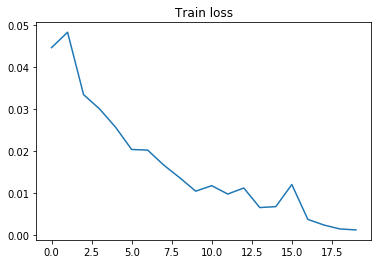

In [40]:
plt.title("Train loss")
plt.plot(np.arange(len(losses)), losses)

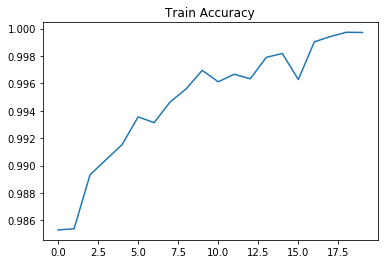

In [41]:
plt.title("Train Accuracy")
plt.plot(np.arange(len(accur)), accur)

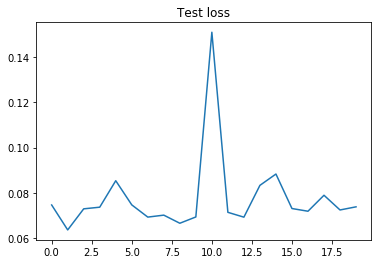

In [42]:
plt.title('Test loss')
plt.plot(np.arange(len(val_losses)),val_losses)

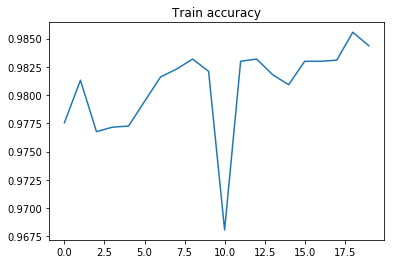

In [43]:
plt.title('Train accuracy')
plt.plot(np.arange(len(val_accur)),val_accur)

It can be seen that our three-layer network can achieve 99.9% accuracy on the training set and 98.4% accuracy on the test set.

**Small practice: Take a look at the training process above and see how the accuracy is calculated. Pay special attention to the max function.**

**Re-implement a new network, try changing the number of hidden layers and activation functions to see what new results are there.**